In [ ]:
#import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load data

matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")

In [ ]:
# Display shapes of the datasets

print("Matches shape:", matches.shape)
print("Deliveries shape:", deliveries.shape)

Matches shape: (1095, 20)
Deliveries shape: (260920, 17)


In [ ]:
# Display first few rows of matches dataset
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [ ]:
# Check for missing values(null values) in matches dataset
# column wise count 

matches.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [ ]:

# Check for missing values in deliveries dataset
# column wise count
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

In [ ]:
# Data Cleaning: Handling missing values

matches.info()
deliveries.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

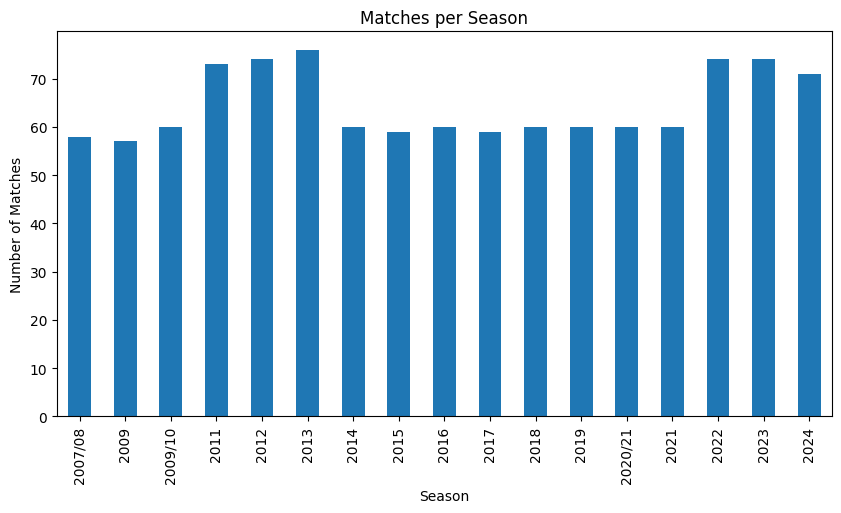

In [ ]:
# total matches played per season visualization

plt.figure(figsize=(10,5))
matches['season'].value_counts().sort_index().plot(kind='bar')
plt.title("Matches per Season")
plt.xlabel("Season")
plt.ylabel("Number of Matches")
plt.show()


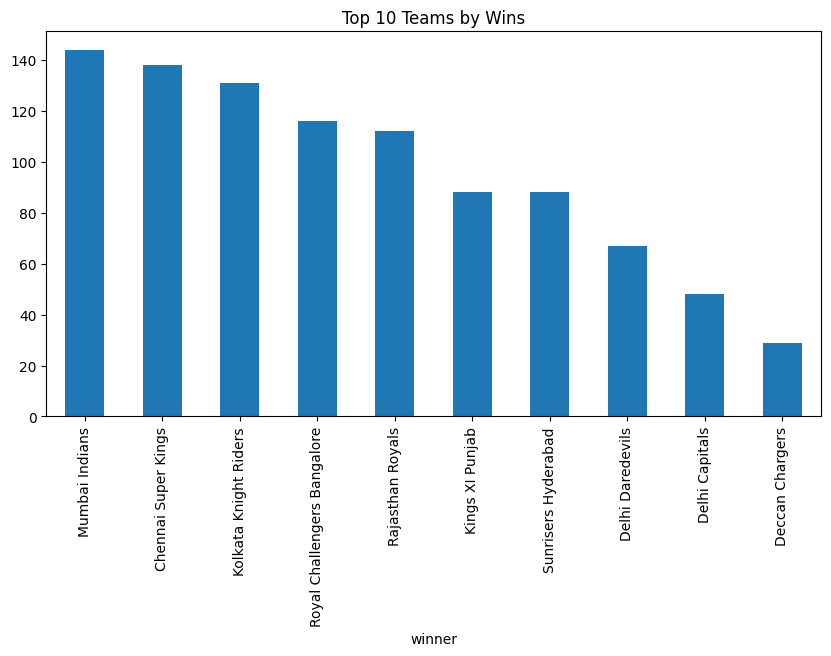

In [ ]:
# top teams by wins
plt.figure(figsize=(10,5))
matches['winner'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Teams by Wins")
plt.show()


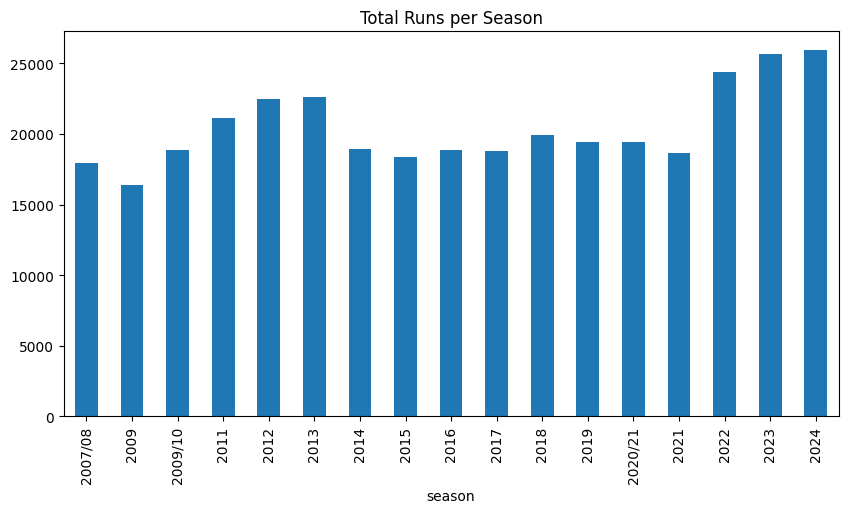

In [26]:
# total runs per season 

season_runs = deliveries.merge(matches[['id','season']], left_on='match_id', right_on='id')

plt.figure(figsize=(10,5))
season_runs.groupby('season')['total_runs'].sum().plot(kind='bar')
plt.title("Total Runs per Season")
plt.show()


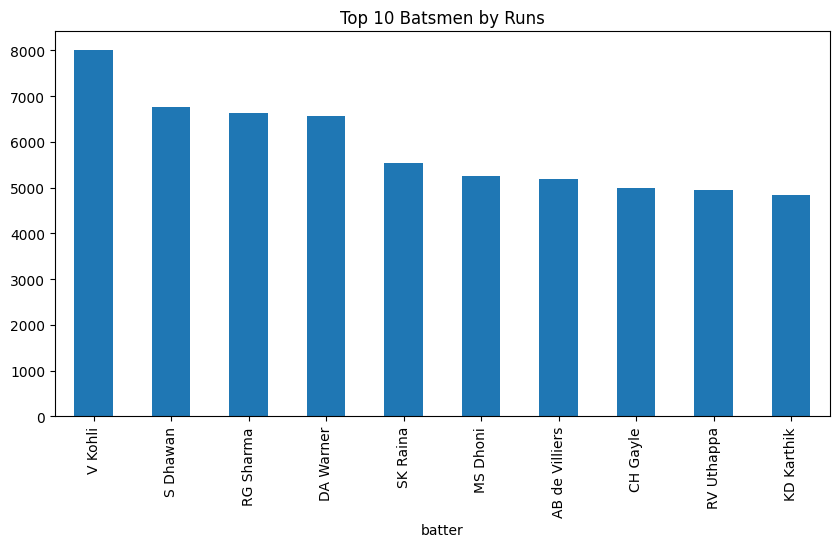

In [ ]:
# top batsmen by runs in all seasons

top_batsmen = deliveries.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_batsmen.plot(kind='bar')
plt.title("Top 10 Batsmen by Runs")
plt.show()


In [1]:
import pandas as pd

matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")

# Separate numeric and categorical columns
num_cols = matches.select_dtypes(include=['int64', 'float64']).columns
cat_cols = matches.select_dtypes(include=['object']).columns

# Fill missing values properly
matches[num_cols] = matches[num_cols].fillna(0)
matches[cat_cols] = matches[cat_cols].fillna("Unknown")

# Save cleaned files
matches.to_csv("matches_cleaned.csv", index=False)
deliveries.to_csv("deliveries_cleaned.csv", index=False)

print("Data cleaning completed successfully!")


Data cleaning completed successfully!
